# Exercice 4 : Newton par Numa GOUT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

## Question 1 : 

In [2]:
# On defini la suite de newton qui nous intéresse
def newton(z, p, q, qq = None, h = None):
    return (z - p(z)/q(z))

In [3]:
# On défini les polynomes
# p1 = z^4 -1
p1 = np.poly1d([1, 0, 0, 0, -1])
q1 = p1.deriv()
qq1 = p1.deriv()
r1 = p1.roots
r1_2 = q1.roots
r1_3 = qq1.roots
# p2 = z^5 -1
p2 = np.poly1d([1, 0, 0, 0, 0, -1])
q2 = p2.deriv()
qq2 = p2.deriv()
r2 = p2.roots
r2_2 = q2.roots
r2_3 = qq2.roots
# p3 = z^6 - jz -1
p3 = np.poly1d([1, 0, 0, 0, 0, -1j, -1])
q3 = p3.deriv()
qq3 = p3.deriv()
r3 = p3.roots
r3_2 = q3.roots
r3_3 = qq3.roots

### Tracé des ensembles pour $z^4 - 1$

***Ensemble de Julia***

In [4]:
def Julia(z, polynome, pderiv, roots, pderivroots, N, methode='newton', pderiv2 = None, h = None):
    """ Si z appartient à l'ensemble, renvoie le tuple (True, nb d'itération, racine atteinte),
        Sinon renvoie (False, **, **) """
    n = 0
    zn = z
    r0 = None
    eps = 10**-2
    while n < N: # Si n atteint N on supposera que la suite ne tend pas vers une racine
        if methode != 'Halley':
            if zn not in pderivroots:
                zn = eval(methode+'(zn, polynome, pderiv, pderiv2, h)') # cette méthode execute un string 
                                                                        # comme une ligne de code
        else:
            if zn not in pderivroots and polynome(z)*pderiv2(z) != 2*pderiv(z)**2: # condition de division par 0
                zn = eval(methode+'(zn, polynome, pderiv, pderiv2, h)')
        for r in roots:
            if np.abs(zn - r)**2 < eps: # Condition de convergence quadratique
                r0 = r
                break
        if r0 != None:
            break
        n += 1
    return (n != N), n, r0   

In [5]:
def TraceFractale(A, B, polynome, pderiv, roots, pderivroots, N, methode = 'newton', pderiv2 = None, h= None):
    """Pour chaque complexe appartenant à A x iB, renvoie une matrice de pixel RVB, t (avec t transparence fonction de la 
       vitesse de convergence"""
    # Liste des couleurs associées à chaque racines
    couleurs = [[np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256), 255] for r in roots]
    r0 = list(roots)
    image = np.zeros((len(A), len(B), 4), dtype = np.int) # Initialisation de la matrice de pixel toute noire
    for a in range(len(A)):
        for b in range(len(B)):
            z = A[a] + B[b]*1j
            t, n, r = Julia(z, polynome, pderiv, roots, pderivroots, N, methode, pderiv2, h)
            if t:
                image[a, b] = couleurs[r0.index(r)][:]
                image[a, b, 3] = int(255*(1 - np.exp(-np.log(20)/N*(n+10)))) # fonction qui associe une vitesse de convergence
                                                                             # à une transparence (voir Annexe explication)
            else:
                image[a, b, 3] = 255 # Si le point de converge pas on le met en opaque
    return image, couleurs

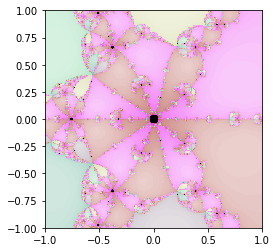

In [8]:
# Tracer de l'ensemble pour z dans A x iB
A = np.linspace(-1, 1, 300)
B = np.linspace(-1, 1, 300)
im, coul = TraceFractale(A, B, p3, q3, r3, r3_2, 100)
plt.imshow(im, extent=[A[0], A[-1], B[0], B[-1]])

## Question 2 :

Je n'ai pas réussi à calculer la dimension, je n'arrive pas à trouver un patern qui se ressemble et plus on \<\< zoom \>\> plus le patern se répète.
    
En revanche on remarque des motifs macro qui se répète, comme les espèces de croissant sur les rayons partant du centre

## Question 3 :

Nous allons utiliser différentes suites censé converger vers les racines :

***Newton relaxe :***

$$z_{n+1} = z_n - h \frac{f(z)}{f^{'}(z)}$$ avec $h \in [0, 1]$

***Super Newton :***

$$z_{n+1} = z_n - \frac{f(z)}{f^{'}(z)} - \frac{f^2(z)f^{''}(z)}{2f^{'3}(z)}$$

***Halley :***

$$z_{n+1} = z_n - \frac{f(z)}{f^{'} - \frac{f(z)f^{''}(z)}{2f^{'2}(z)}}$$

In [7]:
# On défini les autres suites censé converger vers les racines
def newton_relax(z, p, q, qq = None, h = 0.5):
    return (z - h*p(z)/q(z))
def super_newton(z, p, q, qq, h=None):
    P = p(z)
    Q = q(z)
    QQ = qq(z)
    return (z - P/Q - (P*P*QQ)/(2*Q*Q*Q))
def halley(z, p, q, qq, h = None):
    P = p(z)
    Q = q(z)
    QQ = qq(z)
    return (z - P/(Q - (P*QQ)/(2*Q*Q)))

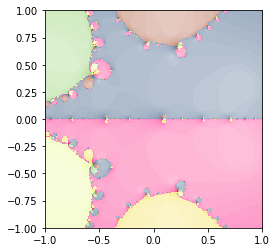

In [9]:
# Tracer de l'ensemnle pour z dans A x iB
A = np.linspace(-1, 1, 300)
B = np.linspace(-1, 1, 300)
im, coul = TraceFractale(A, B, p3, q3, r3, r3_2, 100, methode = 'newton_relax', pderiv2 = qq3, h = 0.4)
plt.imshow(im, extent=[A[0], A[-1], B[0], B[-1]])

C:\Users\Emprunteur\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in cdouble_scalars
  
C:\Users\Emprunteur\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in cdouble_scalars
  
C:\Users\Emprunteur\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:731: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


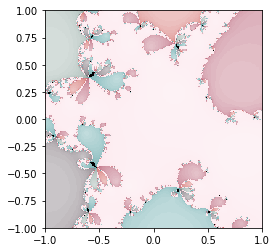

In [10]:
# Tracer de l'ensemble pour z dans A x iB
A = np.linspace(-1, 1, 300)
B = np.linspace(-1, 1, 300)
im, coul = TraceFractale(A, B, p3, q3, r3, r3_2, 100, methode = 'super_newton', pderiv2 = qq3, h= None)
plt.imshow(im, extent=[A[0], A[-1], B[0], B[-1]])

On observe un warning surement dû au fait de la division par $p^{'3}(z)$ qui, si $p^{'}(z)$ se rapproche vers 0, le résultat augmente drastiquement

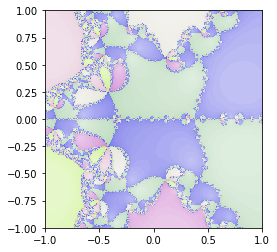

In [11]:
# Tracer de l'ensemble pour z dans A x iB
A = np.linspace(-1, 1, 300)
B = np.linspace(-1, 1, 300)
im, coul = TraceFractale(A, B, p3, q3, r3, r3_2, 100, methode = 'halley', pderiv2 = qq3, h= None)
plt.imshow(im, extent=[A[0], A[-1], B[0], B[-1]])

D'un point de vue numérique ces méthodes mettent environ autant de temps à s'executer. La méthode super newton peut générer des Warning à cause d'une division trop proche de zéro et donc d'un flottant beaucoup trop élevé.

L'extension polynome de numpy nous aide vraiment beaucoup pour cette exercice. Le calcul "exact" des racines est vraiment pratique. Cependant on pourrait généraliser à des fonctions. Il suffit de calculer en amont les dérivés succéssives et les racines et de les injecters dans les algorithmes

Vous pouvez remarquer que j'ai mis tout les polynomes et les listes de racines en attribut des fonctions pour que le calcul ne se fasse qu'une seule fois et en amont de l'algorithme. En effet, si avant chaque intération de $Julia$ on calcule les dérivé et les racines cela augmente considérablement la complexité.

# Annexe

#### Explication de la fonction $t = f(n)$

Pour chaque complexe $z$ on a donc une vitesse de convergence, si la suite converge, estimée en nombre d'itération.
Le nombre d'itération $n$ varie entre 0 et $N$. Cependant comme dans la fonction $Julia$ je calcule la norme quadratique, le nombre d'itération est soit très petit (signe de convergence), soit maximal (signe de divergence).

Le changement brutal de convergent à divergent fait que l'on ne peut donc pas faire une attribution linéaire.

On utilise donc $t = 255 \times (1 - \exp^{-\alpha (n+10})$ pour avoir une forte croissante au début puis une asymptote sur la ligne horizontale $y = 255$, le maximum d'opacité

De plus on prend $\alpha = ln(20)/N$ pour avoir $f(N) = 95% . 255$ et on fait une translation de 10 pour ne pas avoir la valeur 0.

(0, 315.0)

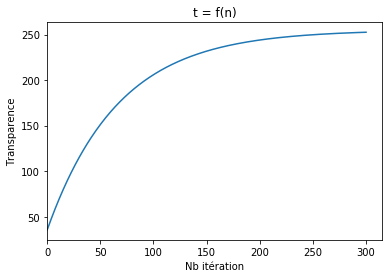

In [12]:
x = np.linspace(0, 300, 400)
y = 255*(1 - np.exp(-np.log(20)/200*(x+10)))
plt.plot(x, y)
plt.title('t = f(n)')
plt.xlabel("Nb itération")
plt.ylabel('Transparence')
plt.xlim(left = 0)